In [1]:

import requests
import pandas as pd
import matplotlib.pyplot as plt



In [2]:

path = '/users/cleiver.moreno.v/documents/Open_AI/ons_deaths/'

urls = [
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2022/publicationfileweek522022.xlsx','2022'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2021/publishedweek522021.xlsx','2021'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2020/publishedweek532020.xlsx','2020'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2019/publishedweek522019.xls','2019'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2018/publishedweek522018withupdatedrespiratoryrow.xls','2018'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2017/publishedweek522017.xls','2017'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2016/publishedweek522016.xls','2016'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2015/publishedweek2015.xls','2015'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2014/publishedweek2014.xls','2014'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2013/publishedweek2013.xls','2013'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2012/publishedweek2012.xls','2012'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2011/publishedweek2011.xls','2011'],
    ['https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/2010/publishedweek2010.xls','2010']
]

for url in urls:
    storage_options = {'User-Agent': 'Mozilla/5.0'}

    r = pd.read_excel(url[0],sheet_name = None,
                     storage_options=storage_options)
    
    sht = r.keys()
    print(sht)


dict_keys(['Cover sheet', 'Contents', 'Notes', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12a', '12b', '13', '14'])
dict_keys(['Analysis', 'Information', 'Contents', 'Terms and conditions', 'Weekly figures 2021', 'Weekly figures by cause', 'Covid-19 - Weekly registrations', 'Covid-19 - Weekly occurrences', 'UK - Covid-19 - Weekly reg', 'Covid-19 - Daily registrations', 'Covid-19 - Daily occurrences', 'Estimated total deaths 2021', 'Covid-19 - Place of occurrence ', 'Weekly Excess Deaths', 'Related publications'])
dict_keys(['Analysis', 'Contents', 'Information', 'Terms and conditions', 'Weekly figures 2020', 'Covid-19 - Weekly registrations', 'Covid-19 - Weekly occurrences', 'UK - Covid-19 - Weekly reg', 'Covid-19 - Daily registrations', 'Covid-19 - Daily occurrences', 'Covid-19 - Place of occurrence ', 'Estimated total deaths 2020', 'Related publications'])
dict_keys(['Contents', 'Information', 'Terms and conditions', 'Weekly figures 2019', 'Related publications'])
dict

this is a markdowm

Annoyingly, the excel files are stored in four (yes four!!!!)
different formats
so we need to make sure they all fit on the same structure


In [3]:
def read_first_format(url):
    c = pd.read_excel(url[0]
                ,sheet_name='Weekly Figures '+url[1]
                ,storage_options=storage_options)  

    data = c.loc[(c['Contents'].str.match(r'([0-9]+)|(Under)|(<)|(\+)')==True)|
               (c['Contents'] == 'Deaths by age group')|
               (c['Contents'].str.match(r'(Female)')==True)|
               (c['Contents'].str.match(r'(Male)')==True)|
               (c['Contents']=='Week ended')]

    data = data.reset_index(drop=True)
    total_data = data.iloc[[0,2,3,4,5,6,7,8]]
    total_data = total_data.T
    total_data.columns = total_data.iloc[0]
    total_data = total_data[1:]
    total_data = total_data.reset_index(drop=True)
    
    return total_data

def read_second_format(url):

    c = pd.read_excel(url[0]
                ,sheet_name='Weekly figures '+url[1]
                ,storage_options=storage_options)    

    data = c.loc[(c['Unnamed: 1'].str.match(r'([0-9]+)|(Under)|(<)|(\+)')==True)|
               (c['Unnamed: 1'] == 'Deaths by age group')|
               (c['Unnamed: 1'].str.match(r'(Female)')==True)|
               (c['Unnamed: 1'].str.match(r'(Male)')==True)|
               (c['Contents']=='Week ended')]

    data = data.reset_index(drop=True)
    total_data = data.iloc[[0,2,3,4,5,6,
                            7,8,9,10,11,12,13,14,
                           15,16,17,18,19,20,21]]
    total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')
    total_data = total_data.T
    total_data.columns = total_data.iloc[1]
    total_data = total_data[2:]
    total_data = total_data.reset_index(drop=True)
    total_data['01-14'] = total_data['1-4']+total_data['5-9']+total_data['10-14']
    total_data['15-44'] = total_data['15-19']+total_data['20-24']+total_data['25-29']+total_data['30-34']+total_data['35-39']+total_data['40-44']
    total_data['45-64'] = total_data['45-49']+total_data['50-54']+total_data['55-59']+total_data['60-64']
    total_data['65-74'] = total_data['65-69']+total_data['70-74']
    total_data['75-84'] = total_data['75-79']+total_data['80-84']
    total_data['85+'] = total_data['85-89']+total_data['90+']
    total_data = total_data[['Week ended','<1','01-14','15-44','45-64','65-74','75-84','85+']]
    total_data = total_data.rename(columns = {'<1':'Under 1 year'})
    total_data = total_data.dropna()

    return total_data

def read_third_format(url):
    c = pd.read_excel(url[0]
            ,sheet_name='Weekly figures '+url[1]
            ,storage_options=storage_options)

    data = c.loc[(c['Unnamed: 1'].str.match(r'([0-9]+)|(Under)|(<)|(\+)')==True)|
           (c['Unnamed: 1'] == 'Deaths by age group')|
           (c['Unnamed: 1'].str.match(r'(Female)')==True)|
           (c['Unnamed: 1'].str.match(r'(Male)')==True)|
           (c['Contents']=='Week ended')]
    data = data.reset_index(drop=True)

    total_data = data.iloc[[0,2,3,4,5,6,7,8]]
    total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')
    total_data = total_data.T
    total_data.columns = total_data.iloc[1]
    total_data = total_data[2:]
    total_data = total_data.reset_index(drop=True)

    return total_data
    


In [4]:
all_data = pd.DataFrame()

for url in urls:
    print(url[1])
    storage_options = {'User-Agent': 'Mozilla/5.0'}
                
    try:            
        if (url[1]=='2022'):
            c = pd.read_excel(url[0]
                ,sheet_name='2'
                ,storage_options=storage_options)
            total_data = c[5:]
            total_data = total_data.reset_index(drop=True)
            total_data.columns = total_data.iloc[0]
            total_data = total_data[1:]
            total_data['01-14'] = total_data['01-04']+total_data['05-09']+total_data['10-14']
            total_data['15-44'] = total_data['15-19']+total_data['20-24']+total_data['25-29']+total_data['30-34']+total_data['35-39']+total_data['40-44']
            total_data['45-64'] = total_data['45-49']+total_data['50-54']+total_data['55-59']+total_data['60-64']
            total_data['65-74'] = total_data['65-69']+total_data['70-74']
            total_data['75-84'] = total_data['75-79']+total_data['80-84']
            total_data['85+'] = total_data['85-89']+total_data['90+']
            total_data = total_data[['Week ending','<1','01-14','15-44','45-64','65-74','75-84','85+']]
            total_data = total_data.rename(columns={'Week ending':'Week ended','<1':'Under 1 year'})
            total_data = total_data[0:52]

            all_data = pd.concat([all_data,total_data])
  
        elif (url[1] == '2020') or (url[1]=='2021'):
            total_data = read_second_format(url)
            all_data = pd.concat([all_data,total_data])
        else :
            total_data = read_third_format(url)
            all_data = pd.concat([all_data,total_data])
    except:
        pass
        total_data = read_first_format(url)
        all_data = pd.concat([all_data,total_data])

all_data = all_data.reset_index(drop=True)
                

2022
2021


/var/folders/n2/_7sct_q521s38c5cqybqg6h00000gn/T/ipykernel_1667/210566667.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')


2020


/var/folders/n2/_7sct_q521s38c5cqybqg6h00000gn/T/ipykernel_1667/210566667.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')
/var/folders/n2/_7sct_q521s38c5cqybqg6h00000gn/T/ipykernel_1667/210566667.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')


2019
2018


/var/folders/n2/_7sct_q521s38c5cqybqg6h00000gn/T/ipykernel_1667/210566667.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')
/var/folders/n2/_7sct_q521s38c5cqybqg6h00000gn/T/ipykernel_1667/210566667.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')


2017
2016


/var/folders/n2/_7sct_q521s38c5cqybqg6h00000gn/T/ipykernel_1667/210566667.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['Unnamed: 1'] = total_data['Unnamed: 1'].fillna('Week ended')


2015
2014
2013
2012
2011
2010


In [5]:

all_data = all_data.reset_index(drop=True)
all_data['Week ended'] = pd.to_datetime(all_data['Week ended'])
print(all_data)

    Week ended Under 1 year 01-14 15-44 45-64 65-74 75-84   85+
0   2022-01-07           49    14   284  1449  1969  3562  4935
1   2022-01-14           49    18   330  1599  2109  3878  5328
2   2022-01-21           42    15   361  1520  2160  3668  5010
3   2022-01-28           44    22   320  1505  1902  3621  4987
4   2022-02-04           41    16   296  1565  1910  3376  4658
..         ...          ...   ...   ...   ...   ...   ...   ...
673 2010-12-03           51    19   280  1199  1516  2764  3391
674 2010-12-10           59    29   338  1396  1736  3336  4298
675 2010-12-17           62    23   349  1466  1642  3193  4145
676 2010-12-24           64    35   405  1463  1796  3465  4255
677 2010-12-31           40    21   218  1254  1514  2861  3778

[678 rows x 8 columns]


Text(0.5, 1.0, 'Number of Recorded deaths in //nEngland and Wales since 2010')

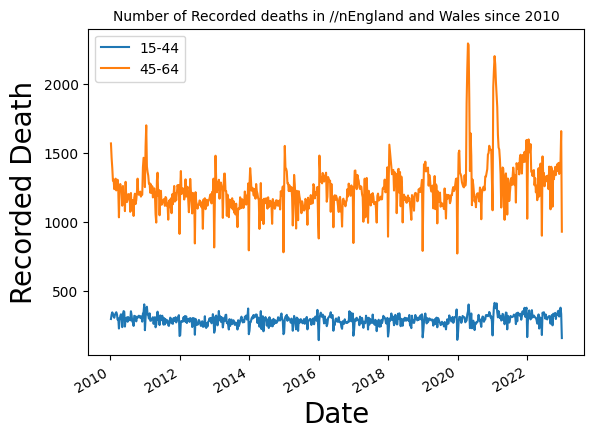

In [7]:

all_data.plot(x="Week ended", y=['15-44','45-64'])
# all_data.plot(x="Week ended", y=["Under 1 year",'01-14','15-44','45-64','65-74','75-84','85+'])
plt.xlabel("Date",  size = 20)
plt.ylabel("Recorded Death", size = 20)
plt.title("Number of Recorded deaths in //nEngland and Wales since 2010", size =10 )

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
673    0.046177
674    0.170526
675    0.020780
676    0.073088
677    0.104207
Name: YoY_44, Length: 678, dtype: float64


Text(0.5, 1.0, 'Number of Recorded deaths in //nEngland and Wales since 2010')

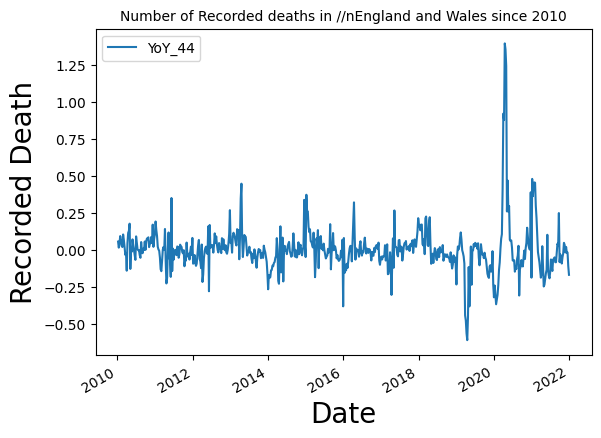

In [21]:
all_data['YoY_44'] = all_data['75-84'].pct_change(52)

print(all_data['YoY_44'])

all_data.plot(x="Week ended", y=['YoY_44'])

# all_data.plot(x="Week ended", y=["Under 1 year",'01-14','15-44','45-64','65-74','75-84','85+'])
plt.xlabel("Date",  size = 20)
plt.ylabel("Recorded Death", size = 20)
plt.title("Number of Recorded deaths in //nEngland and Wales since 2010", size = 10)


Text(0.5, 1.0, 'Number of Recorded deaths in //nEngland and Wales since 2010')

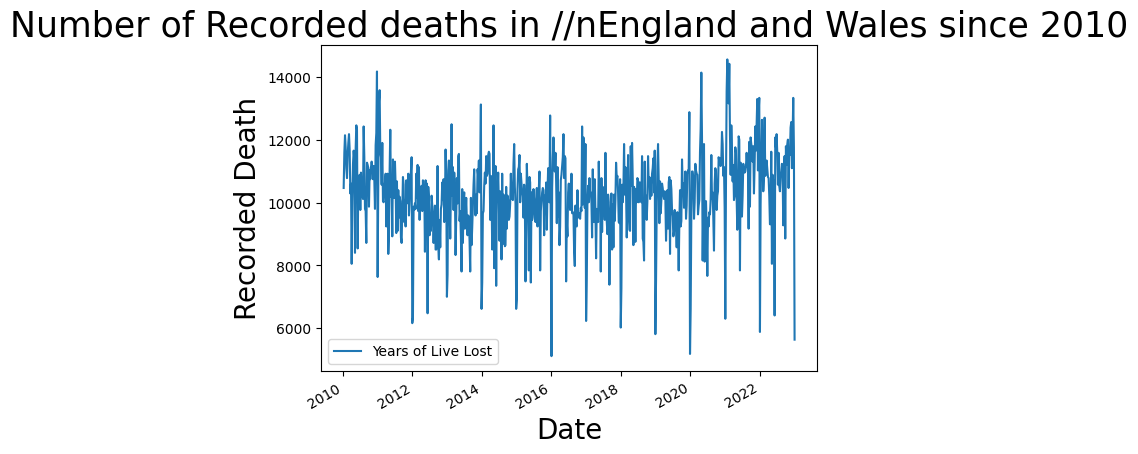

In [38]:
all_data['Years of Live Lost'] = (65-30)*all_data['15-44']
all_data['Deaths'] = all_data['Under 1 year']+all_data['01-14']+all_data['15-44']+all_data['45-64']

all_data['PYLL'] = all_data['Years of Live Lost']/all_data['15-44']

all_data.plot(x="Week ended", y=['Years of Live Lost'])
plt.xlabel("Date",  size = 20)
plt.ylabel("Recorded Death", size = 20)
plt.title("Number of Recorded deaths in //nEngland and Wales since 2010", size = 25)